### Домашнее задание <a class="anchor" id="hw"></a><center>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ подойдет ли репетитор для подготовки к экзамену по математике

In [45]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [46]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [47]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

**1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [48]:
def calc_logloss(y, y_pred):
    err = 0
    for i in range(len(y)):
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y)

In [49]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.9])
calc_logloss(y1, y_pred1)

1.2039728043259361

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [50]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [51]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
            
    final_error = calc_logloss(y, y_pred)
    return W, final_error

Вручную

In [52]:
I =[]
ERR =[]
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            I.append(i)
            ERR.append(err)
            print(i, W, err)
            
    return W

In [53]:
W = eval_model(X_st, y, iterations=500, eta=1e-1)
print(I,ERR)

0 [ 0.49316424 -0.16534625  0.62434587  1.51058188] 0.760958797591889
50 [ 0.20303469 -0.98724972 -0.00507867  1.39327336] 0.4670462339429721
100 [ 0.06271245 -1.25799764 -0.13232157  1.68787952] 0.4263345307175606
150 [ 0.01193664 -1.44791436 -0.21784682  1.9713236 ] 0.4008534720908756
200 [-0.00651113 -1.60477247 -0.29748287  2.22239001] 0.3818815713692781
250 [-0.01188602 -1.73833957 -0.37351791  2.4470215 ] 0.36699227849705973
300 [-0.01105539 -1.85415674 -0.44638474  2.65047256] 0.3549229121742396
350 [-0.00673832 -1.95606084 -0.51633715  2.83665834] 0.34489744444361736
400 [-1.66993123e-04 -2.04682776e+00 -5.83589012e-01  3.00853587e+00] 0.33640348223195904
450 [ 0.00800763 -2.12852186 -0.64833647  3.16838777] 0.3290875183873171
[0, 50, 100, 150, 200, 250, 300, 350, 400, 450] [0.760958797591889, 0.4670462339429721, 0.4263345307175606, 0.4008534720908756, 0.3818815713692781, 0.36699227849705973, 0.3549229121742396, 0.34489744444361736, 0.33640348223195904, 0.3290875183873171]


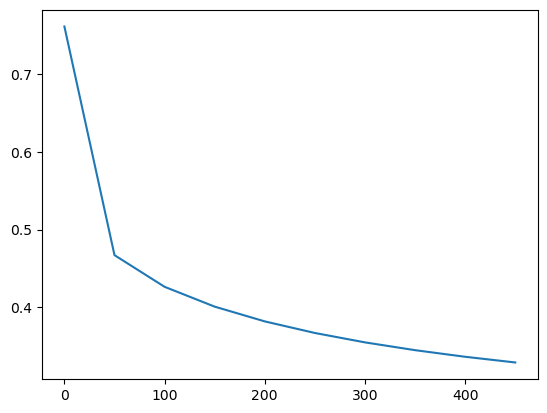

In [54]:
plt.plot(I, ERR)
plt.show()

**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [55]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [56]:
calc_pred_proba(W, X_st)

array([0.33128098, 0.26991553, 0.91668004, 0.01867299, 0.64462726,
       0.41020876, 0.96122194, 0.19581425, 0.34768435, 0.88414203])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [57]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    return y_pred

In [58]:
pred = calc_pred(W, X_st)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])